In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [7]:
# (do not change this code)
words = open('names.txt').read().splitlines()

In [9]:
print(len(words))
print(words[:10])

32033
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [10]:
# (do not change this code)
chars = sorted(list(set([c for w in words for c in w])))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [11]:
print(chars)
print(stoi)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [12]:
# (do not change this code)
itos = {i:s for s,i in stoi.items()}

In [13]:
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [14]:
# Exercise 1: build a simple bigram model for next-character prediction
# - store the co-counts of each character in a 27x27 matrix N
# - compute the normalized probabilities into a matrix P
# - generate a bunch of samples from the model using P and torch.multinomial

In [15]:
N = torch.zeros(27, 27)
for w in words:
    w = '.' + w + '.'
    k = len(w)
    for i in range(k-1):
        j = i+1
        c1 = w[i]
        c2 = w[j]
        i1 = stoi[c1]
        i2 = stoi[c2]
        N[i1][i2] = N[i1][i2] + 1

In [16]:
N.shape

torch.Size([27, 27])

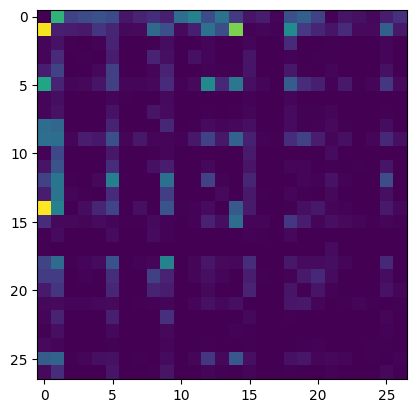

In [17]:
# display the matrix
plt.imshow(N)
plt.show()

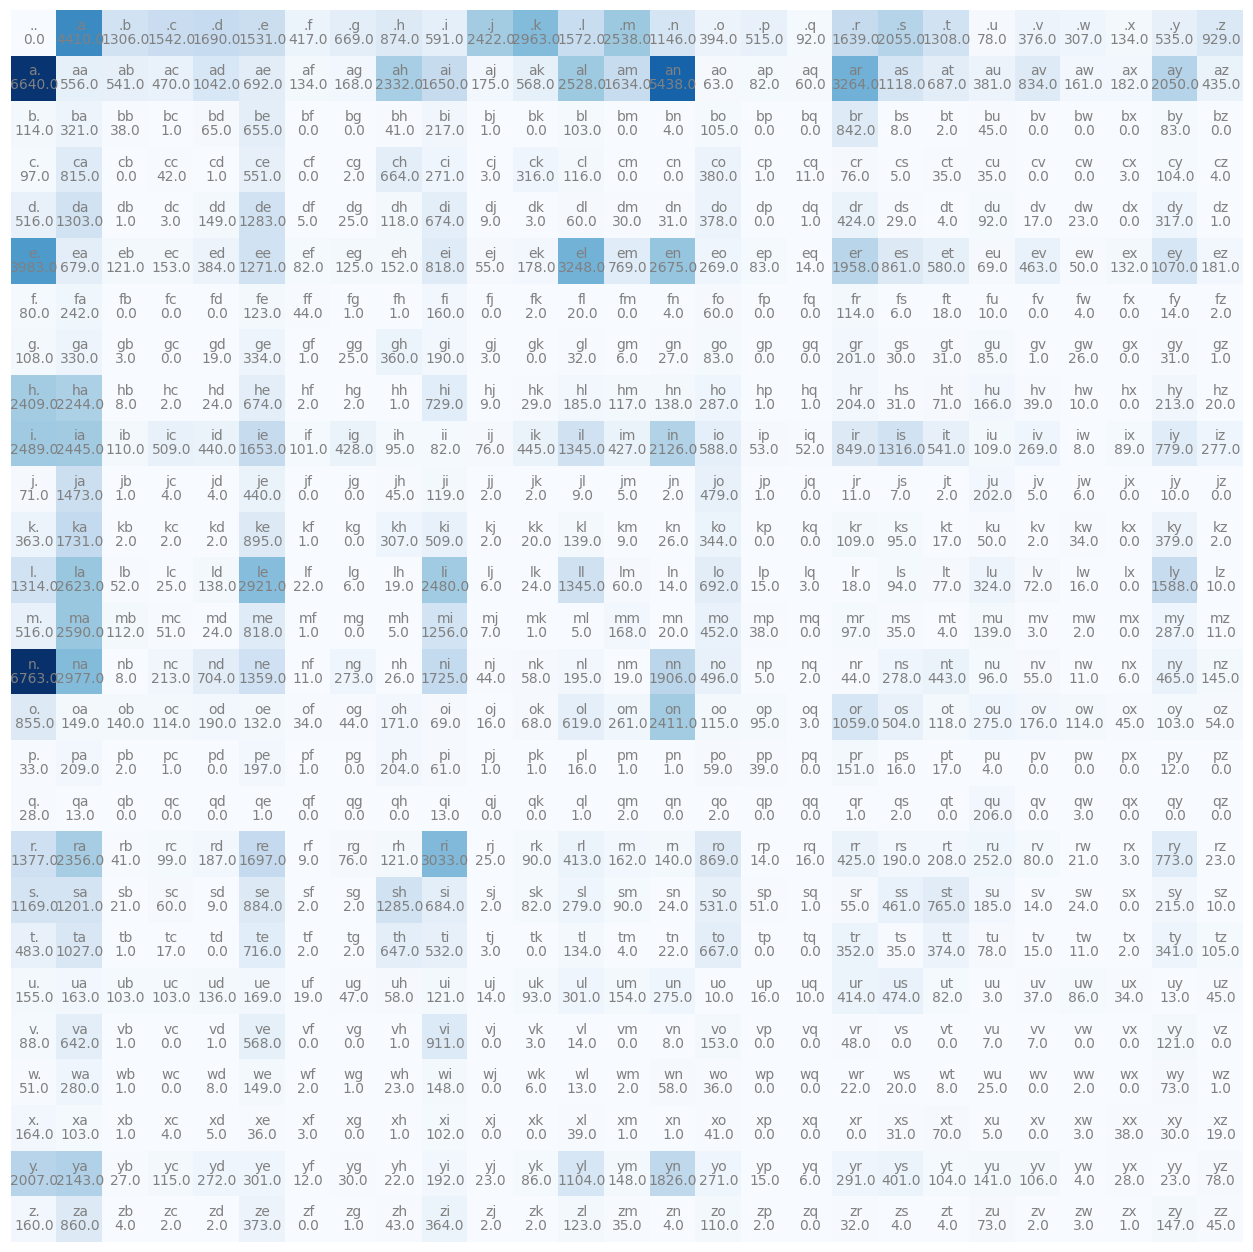

In [18]:
#display the matrix in human-readable format
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

In [19]:
# useful to reproduce results
g = torch.Generator().manual_seed(2147483647)

In [20]:
P = N.float()
P = P / P.sum(1, keepdim=True)
P.shape

torch.Size([27, 27])

In [21]:
# sample 30 words from the model (hint: use torch.multinomial)
for _ in range(30):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

cexze
momasurailezitynn
konimittain
llayn
ka
da
staiyaubrtthrigotai
moliellavo
ke
teda
ka
emimmsade
enkaviyny
ftlspihinivenvorhlasu
dsor
br
jol
pen
aisan
ja
feniee
zem
deru
firit
gaikajahahbevare
kiysthelenaririenah
keen
x
al
kal


In [22]:
# Exercise 2: build the same bigram model using the NLL loss
# - the dataset is created and encoded for you
# - create the weights matrix W
# - build a training loop to minimize the NLL
# - sample from the model

In [23]:
# create a training set for bigram model
# (do not change this code) 
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [24]:
print(num)
print(xs)
print(ys)

228146
tensor([ 0,  5, 13,  ..., 25, 26, 24])
tensor([ 5, 13, 13,  ..., 26, 24,  0])


In [25]:
len(xs), len(ys)

(228146, 228146)

In [26]:
import torch.nn.functional as F

In [27]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(27, 27, generator=g)
W.requires_grad= True
W.shape

torch.Size([27, 27])

In [28]:
# training loop
for k in range(200):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # encode xs with F.one_hot
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    # NLL loss
    loss = -probs[torch.arange(num), ys].log().mean()
    
    # backward pass
    loss.backward()

    # update
    W.data += -10.0 * W.grad
    W.grad = None
    
    print(loss.item())

3.758953094482422
3.6702587604522705
3.591153860092163
3.520017385482788
3.4557948112487793
3.397716522216797
3.345163583755493
3.297590494155884
3.254483938217163
3.2153542041778564
3.1797327995300293
3.147189140319824
3.117339849472046
3.0898520946502686
3.064443349838257
3.0408780574798584
3.0189590454101562
2.998518705368042
2.9794161319732666
2.9615302085876465
2.9447529315948486
2.928992509841919
2.9141643047332764
2.900193452835083
2.887012243270874
2.874558687210083
2.862776279449463
2.851613998413086
2.841024398803711
2.830965757369995
2.8213980197906494
2.812286138534546
2.8035972118377686
2.7953009605407715
2.7873711585998535
2.7797818183898926
2.7725107669830322
2.7655372619628906
2.7588419914245605
2.7524070739746094
2.7462172508239746
2.7402572631835938
2.7345142364501953
2.7289748191833496
2.723628520965576
2.7184643745422363
2.713472366333008
2.708644390106201
2.7039716243743896
2.699446678161621
2.6950621604919434
2.6908113956451416
2.6866886615753174
2.682687997817993

In [29]:
# finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x @ W
        counts = logits.exp()
        counts = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(counts, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

cexza
mogllurail
azityha
konimittai
n
llayn
ka
da
staiyauela
bhrigotai


In [30]:
# Exercise 3: homework (*) extend the previous model to trigram

In [31]:
## Solution ex3: trigram

# create a training set for trigram model
xs1, xs2, ys = [], [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1, c2, c3 in zip(chs, chs[1:], chs[2:]):
        xs1.append(stoi[c1])
        xs2.append(stoi[c2])
        ys.append(stoi[c3])

xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
ys = torch.tensor(ys)
num = ys.nelement()

xs1.shape, xs2.shape, ys.shape, num

(torch.Size([196113]), torch.Size([196113]), torch.Size([196113]), 196113)

In [32]:
# generate weight matrix
import torch.nn.functional as F

g = torch.Generator().manual_seed(2147483647)
W_trigram = torch.randn((2*27, 27), generator=g)  
W_trigram.requires_grad = True
W_trigram.shape

torch.Size([54, 27])

In [33]:
# training loop for trigram
for k in range(500):
    #forward pass
    x1 = F.one_hot(xs1, num_classes=27).float()
    x2 = F.one_hot(xs2, num_classes=27).float()
    xenc = torch.cat([x1, x2], dim=1)

    logits = xenc @ W_trigram
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    # NLL loss
    loss = -probs[torch.arange(num), ys].log().mean()
    
    # backward pass
    loss.backward()

    # update
    W_trigram.data += -50.0 * W_trigram.grad
    W_trigram.grad = None
    
    print(loss.item())

4.186270713806152
3.3573689460754395
3.042151689529419
2.871455430984497
2.7671947479248047
2.694681406021118
2.6390926837921143
2.5949816703796387
2.559002637863159
2.529222249984741
2.5042338371276855
2.483072519302368
2.464961051940918
2.4493141174316406
2.435654401779175
2.423619031906128
2.412919521331787
2.4033381938934326
2.394700527191162
2.386871337890625
2.379739999771118
2.3732175827026367
2.3672289848327637
2.3617117404937744
2.3566133975982666
2.3518879413604736
2.34749698638916
2.343406915664673
2.3395884037017822
2.3360161781311035
2.332667350769043
2.3295228481292725
2.3265652656555176
2.3237786293029785
2.3211495876312256
2.3186655044555664
2.3163154125213623
2.314089059829712
2.3119773864746094
2.3099725246429443
2.3080661296844482
2.3062520027160645
2.304523468017578
2.302875518798828
2.301301956176758
2.2997987270355225
2.298360824584961
2.2969844341278076
2.2956652641296387
2.294400691986084
2.293186902999878
2.2920212745666504
2.290900468826294
2.2898223400115967


In [34]:
# finally, sample from the neural net model trigram
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix1 = 0
    ix2 = 0
    for _ in range(10):
        x1 = F.one_hot(torch.tensor([ix1]), num_classes=27).float()
        x2 = F.one_hot(torch.tensor([ix2]), num_classes=27).float()
        x = torch.cat([x1, x2], dim=1)

        logits = x @ W_trigram
        counts = logits.exp()
        counts = counts / counts.sum(1, keepdim=True)

        ix3 = torch.multinomial(counts, num_samples=1, replacement=True, generator=g).item()

        if ix3 == 0:
            break
        out.append(itos[ix3])
        ix1, ix2 = ix2, ix3
        
    print(''.join(out))

aexze
ahallurail
aziaydamel
zimittain
alayn
ka
ar
ra
zyaubrtthr
uintai


In [36]:
# Exercise 4: let's build a better model
# Bengio et al. 2003 MLP language model paper, https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [37]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# build the dataset (do not change this code)
block_size = 3
def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

In [39]:
X_train.shape, Y_train.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [40]:
print(X_train[:5])
print(Y_train[:5])

tensor([[ 0,  0,  0],
        [ 0,  0, 25],
        [ 0, 25, 21],
        [25, 21,  8],
        [21,  8,  5]])
tensor([25, 21,  8,  5, 14])


In [41]:
emb_size = 300
g = torch.Generator().manual_seed(2147483647)

# embedding table
C = torch.randn(27, emb_size, generator=g) # (vocab, emb)

W1 = torch.randn(block_size * emb_size, 128, generator=g) # (block * emb, hidden)
b1 = torch.randn(128, generator=g)

W2 = torch.randn(128, 27, generator=g) # (hidden, vocab)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

C.shape, W1.shape, b1.shape, W2.shape, b2.shape

(torch.Size([27, 300]),
 torch.Size([900, 128]),
 torch.Size([128]),
 torch.Size([128, 27]),
 torch.Size([27]))

In [44]:
# init weights (use torch.nn.init)
b1 = torch.nn.init.zeros_(b1)
b2 = torch.nn.init.zeros_(b2)
W1 = torch.nn.init.normal_(W1, mean=0, std=1)
W2 = torch.nn.init.normal_(W2, mean=0, std=1)

W1.shape, b1.shape, W2.shape, b2.shape

(torch.Size([900, 128]),
 torch.Size([128]),
 torch.Size([128, 27]),
 torch.Size([27]))

In [45]:
stepi = []
lossi = []

In [46]:
for p in parameters:
    p.requires_grad = True

In [47]:
# training loop (use the cross-entropy loss)
batch_size = 3000
for i in range(2000):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,))

    # forward pass
    emb = C[X_train[ix]] 
    h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1) # hint: to flatten a tensor x, use x.view (-1, ...) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])

    # backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    for p in parameters:
        p.data -= 0.1 * p.grad

    stepi.append(i)
    lossi.append(loss.log10().item())
    
    print(i, loss)

0 tensor(24.7978, grad_fn=<NllLossBackward0>)
1 tensor(22.5238, grad_fn=<NllLossBackward0>)
2 tensor(22.1080, grad_fn=<NllLossBackward0>)
3 tensor(21.1283, grad_fn=<NllLossBackward0>)
4 tensor(20.3020, grad_fn=<NllLossBackward0>)
5 tensor(19.7027, grad_fn=<NllLossBackward0>)
6 tensor(19.4633, grad_fn=<NllLossBackward0>)
7 tensor(19.0879, grad_fn=<NllLossBackward0>)
8 tensor(18.5542, grad_fn=<NllLossBackward0>)
9 tensor(18.4251, grad_fn=<NllLossBackward0>)
10 tensor(18.0384, grad_fn=<NllLossBackward0>)
11 tensor(17.7629, grad_fn=<NllLossBackward0>)
12 tensor(17.8359, grad_fn=<NllLossBackward0>)
13 tensor(17.1525, grad_fn=<NllLossBackward0>)
14 tensor(17.0228, grad_fn=<NllLossBackward0>)
15 tensor(17.0157, grad_fn=<NllLossBackward0>)
16 tensor(16.7640, grad_fn=<NllLossBackward0>)
17 tensor(16.2616, grad_fn=<NllLossBackward0>)
18 tensor(16.4020, grad_fn=<NllLossBackward0>)
19 tensor(16.0238, grad_fn=<NllLossBackward0>)
20 tensor(15.7841, grad_fn=<NllLossBackward0>)
21 tensor(15.8892, grad

In [48]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 4)

for _ in range(20):
    out = []
    context = [0] * block_size
    
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix] 
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

gari.
phro.
walyn.
alaya.
amae.
jalle.
jabellonta.
bdafilon.
ictillaya.
eela.
cossiel.
ceria.
aen.
ell.
liznhkona.
ralynn.
aeryna.
danel.
racalette.
aari.


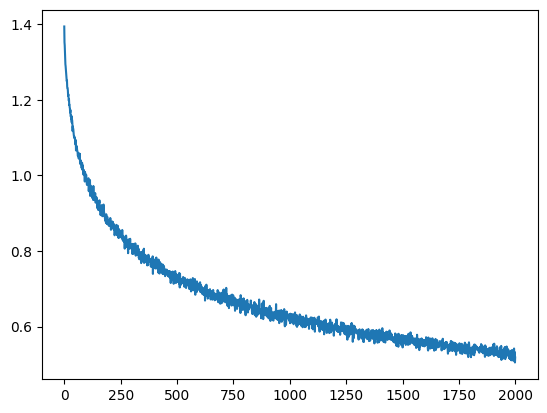

In [49]:
plt.plot(stepi, lossi)
plt.show()

In [50]:
# compute the train and val loss
@torch.no_grad()
def split_loss(X, Y):
    emb = C[X]                                    
    h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    return loss.item()

train_loss = split_loss(X_train, Y_train)
val_loss   = split_loss(X_dev, Y_dev)

train_loss, val_loss

(3.3647398948669434, 3.4316372871398926)

In [51]:
# compute the train and val loss.  here are the initial results I got.  
# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.

## Solution:
# hyper-params
emb_size = 100
hidden_size = 300
batch_size = 2048
max_steps = 4000

# intialize model
C = torch.randn((27, emb_size), generator=g)

W1 = torch.randn((block_size * emb_size, hidden_size), generator=g)
b1 = torch.zeros(hidden_size)

W2 = torch.randn((hidden_size, 27), generator=g)
b2 = torch.zeros(27)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

# init weights (use torch.nn.init)
W1 = torch.nn.init.kaiming_normal_(W1)
W2 = torch.nn.init.kaiming_normal_(W2)

In [52]:
stepi, lossi = [], []
lr = 0.1

for i in range(max_steps):
    
    # mini-batch
    ix = torch.randint(0, X_train.shape[0], (batch_size,))

    # forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(emb.shape[0], -1) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data -= lr * p.grad

    stepi.append(i)
    lossi.append(loss.item())

    if i % 500 == 0:
        print(i, loss.item())


0 6.788930892944336
500 2.153743267059326
1000 2.076941967010498
1500 2.075610399246216
2000 2.108499526977539
2500 2.0777587890625
3000 1.988912582397461
3500 2.0245602130889893


In [53]:
train_loss = split_loss(X_train, Y_train)
val_loss = split_loss(X_dev, Y_dev)

train_loss, val_loss


(2.0273184776306152, 2.106962203979492)

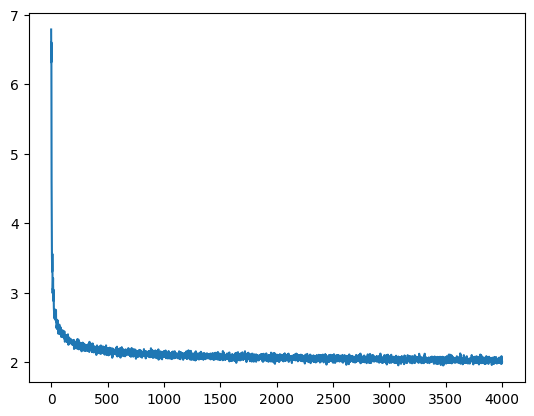

In [54]:
plt.plot(stepi, lossi)
plt.show()

In [55]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 4)

for _ in range(20):
    
    out = []
    context = [0] * block_size
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix] 
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

garri.
yamira.
jacie.
jash.
leigallon.
die.
alis.
jodo.
giovais.
eva.
doreen.
aith.
caliee.
dabret.
elo.
liz.
jon.
brayla.
riter.
bradanel.
